# Chapter 9

## 9.4 - Convolutional Neural Network

A CNN is a type of neural network that is used to classify special data, for instance images, sequences etc. In an image, each pixel is related to some other pictures. Looking at a single pixel, you can't guess the image. Rather you have to look at the complete picture to guess the image. A CNN does exactly that. Using a kernel or feature detects, it detects features within an image. A combination of these images then forms the complete image, which can then be classified using a densely connected neural network.

Here we will perform image classification using CNN

How do computers see images?
- When humans see an image, they see lines, circles, squares and different shapes. Computers see images differently. For a computer, an image is no more than a 2D set of pixels arranged in a certain manner.
- For greyscale images, the pixel value can be between 0-255, while for colour images there are three channels: red, green and blue. Each channel can have a pixel value between 0-255.

The following steps are involved in image classification with CNN:
- 1 - The convolution operation
- 2 - The ReLu Operation
- 3 - The pooling operation
- 4 - Flattening and fully connected layer

The convolution operation
- This is the first step involved in the image classification with a CNN.
- In a convolution operation, you have an image and a feature detector. The values of the feature detector are initialised randomly. The feature detector is moved over the image from left to right. The values in the feature detector are multiplied by the corresponding values in the image, and then all the values in the feature detector are added. The resultant value is added to the feature map.

The ReLu operation
- You can apply the ReLu activation function on the feature map generated in the convolution operation. The convolution operation gives us linear values. The ReLu operation is performed to introduce non-linearity in the image. In the ReLu operation, all the negative values in a feature map are replaced by 0. All the positive values are left untouched.

The pooling operation
- This is performed in order to introduce spatial invariance in the feature map. Pooling operation is performed after convolution and ReLu operation. In pooling, we have a feature map and then a pooling filter, which can be of any size. Next, we move the pooling filter over teh feature map and apply the pooling operations such as max pooling, min pooling and average pooling. In max pooling, we choose the maximum value from the pooling filter. Pooling not only introduces spatial invariance, but also reduces the size of an image.

Flattening and fully connected layer
- The pooled feature maps are flattened to form a one-dimensional vector to find more features from an image. The one dimensional vector is then used as input to a densely or fully connected neural network layer.

Here we will implement CNN for image classification in TensorFlow Keras. We will create CNN that is able to classify an image of fashion items such as shirts, pants, trousers, sandals into one of the 10 predefined categories.

In [33]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [34]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model


this code downloads the fashion MNIST dataset that contains images of different fashion items along with their labels

- the code divides data into training images and training labels, test images and test labels

In [35]:
mnist_data = tf.keras.datasets.fashion_mnist

(training_images, training_labels),(test_images, test_labels) = mnist_data.load_data()

In [36]:
#the images in the dataset are greyscale images, with each pixel value between 0 and 255
#this code normalises pixel values between 0 and 1

training_images, test_images = training_images/255.0, test_images/255.0

In [37]:
#printing the shape of the training data

print(training_images.shape)

#the output shows that the training dataset contains 60,000 records (images)
#each image is 28 pixels wide and 28 pixels high

(60000, 28, 28)


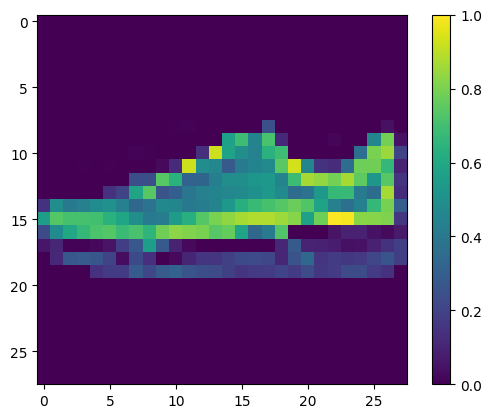

In [38]:
#lets print an image randomly from the test set
#plotting image number 9 from the test set

plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()
#the output shows that the 9th image in the set is a shoe

the next step is to change the dimensions of our input images
- CNN in Keras expects data to be in the format Width-Height-Channels
- our images contain width and height but no channels
- since the images are greyscale, we set the image channel to 1, as shown below

In [39]:
#converting data into the right shape

training_images = np.expand_dims(training_images,-1)
test_images = np.expand_dims(test_images,-1)
print(training_images.shape)

(60000, 28, 28, 1)


the next step is to find the number of output classes
- this number will be used to define the number of neurons in the output layer

In [40]:
output_classes = len(set(training_labels))
print("Number of output classes is:", output_classes)
#the number of output classes in the dataset is 10, as expected (10 categories as discussed earlier)

Number of output classes is: 10


In [41]:
#let's print the shape of a single image in the training set

training_images[0].shape

(28, 28, 1)

this model contains one input layer, two convolutional layers, one flattening layer, one hidden dense layer, and one output layer
- the number of filters in the first convolutional layer is 32, while in the second convolution layer is 64
- the kernel size for both convolutional layers is 3 x 3, with a stride of 2
- after the first convolutional layer, a max-pooling layer with a size of 2 x 2 and a stride of 2 has also been defined

In [46]:
#this code creates a model for our CNN
#developing the CNN model

input_layer = Input(shape=training_images[0].shape)
conv1 = Conv2D(32,(3,3),strides=2,activation="relu")(input_layer)
maxpool1 = MaxPool2D(2,2)(conv1)
conv2 = Conv2D(64,(3,3),strides=2,activation="relu")(maxpool1)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512,activation="relu")(drop1)
drop2 = Dropout(0.2)(dense1)
output_layer = Dense(output_classes,activation="softmax")(drop2)

model = Model(input_layer,output_layer)

it is important that while defining the model layers, we use Keras Functional API to connect previous layers with the next layer, the name of the previous layer is passed  inside the brackets at the end of the next layer

In [47]:
#this code compiles the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

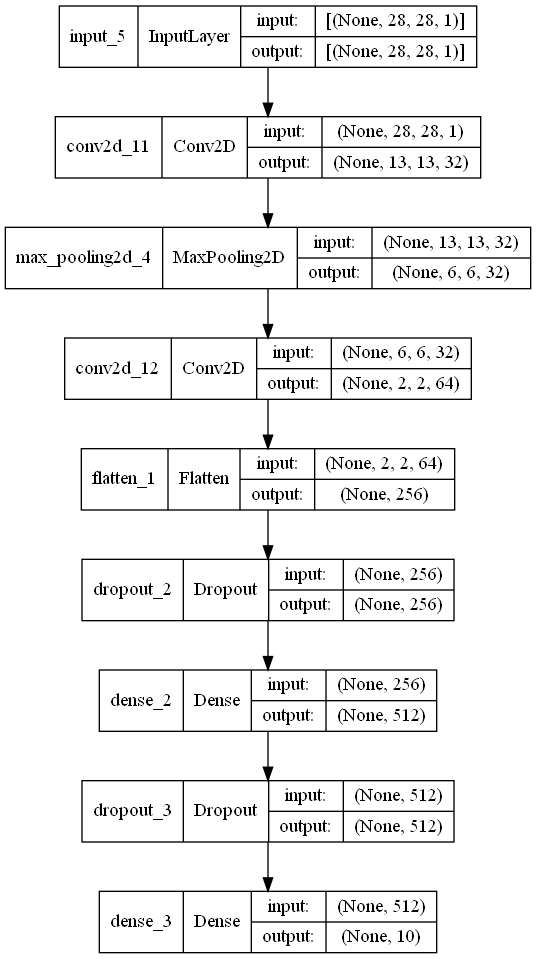

In [48]:
#the following code prints the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="model_plot2.png",show_shapes=True,show_layer_names=True)

the following script trains the image classification model

In [49]:
#training the CNN model

model_history = model.fit(training_images,training_labels,epochs=20,validation_data=(test_images,test_labels),verbose=1)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5828 - accuracy: 0.7872 - val_loss: 0.4476 - val_accuracy: 0.8395
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4222 - accuracy: 0.8423 - val_loss: 0.3854 - val_accuracy: 0.8581
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3783 - accuracy: 0.8603 - val_loss: 0.3698 - val_accuracy: 0.8672
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3504 - accuracy: 0.8696 - val_loss: 0.3625 - val_accuracy: 0.8637
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3300 - accuracy: 0.8767 - val_loss: 0.3372 - val_accuracy: 0.8747
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3149 - accuracy: 0.8811 - val_loss: 0.3314 - val_accuracy: 0.8770
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3031 - accuracy: 0.8851 - val_loss: 0.3263 - val_accuracy:

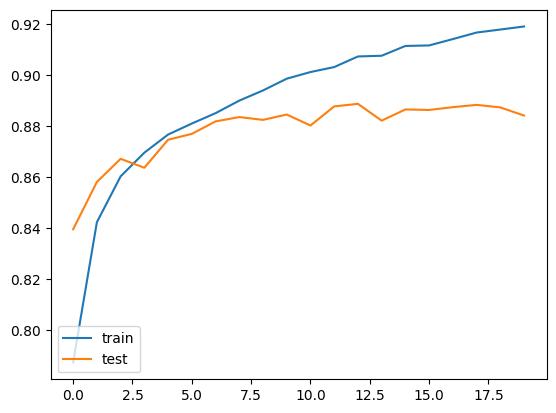

In [50]:
#plotting the training and test accuracies for the model
import matplotlib.pyplot as plt

plt.plot(model_history.history["accuracy"],label="accuracy")
plt.plot(model_history.history["val_accuracy"],label="val_accuracy")
plt.legend(["train","test"],loc="lower left")

In [51]:
#training the model with 50 epochs to see the difference

model_history = model.fit(training_images,training_labels,epochs=50,validation_data=(test_images,test_labels),verbose=1)

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2019 - accuracy: 0.9225 - val_loss: 0.3304 - val_accuracy: 0.8875
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2002 - accuracy: 0.9229 - val_loss: 0.3209 - val_accuracy: 0.8918
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1958 - accuracy: 0.9237 - val_loss: 0.3205 - val_accuracy: 0.8914
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1935 - accuracy: 0.9255 - val_loss: 0.3232 - val_accuracy: 0.8916
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1889 - accuracy: 0.9282 - val_loss: 0.3397 - val_accuracy: 0.8849
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1855 - accuracy: 0.9284 - val_loss: 0.3221 - val_accuracy: 0.8896
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1784 - accuracy: 0.9320 - val_loss: 0.3391 - val_accuracy:

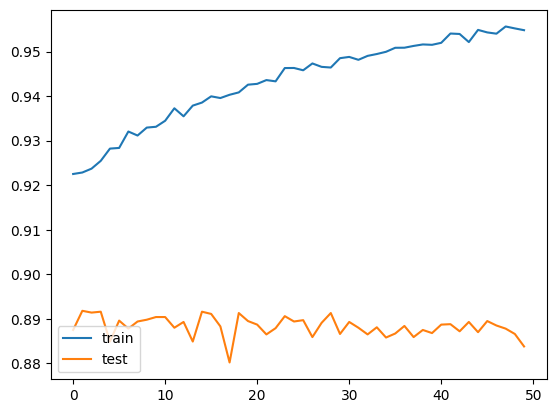

In [52]:
#plotting the training and test accuracies for the model
import matplotlib.pyplot as plt

plt.plot(model_history.history["accuracy"],label="accuracy")
plt.plot(model_history.history["val_accuracy"],label="val_accuracy")
plt.legend(["train","test"],loc="lower left")
#this output does show that more epochs is better compared to the previous graph

now we make a prediction on one of the images in the test set
- let's predict the label for image 9
- we know that image 9 contains a shoe

In [54]:
#making predicts on a single image
output = model.predict(test_images)
prediction = np.argmax(output[9])
print(prediction)
#the output of 7 corresponds with the labels of the categories of items of clothing
#number 7 is a shoe so the CNN is correct

7
